# **決定木分析（分類）：dtreeviz**
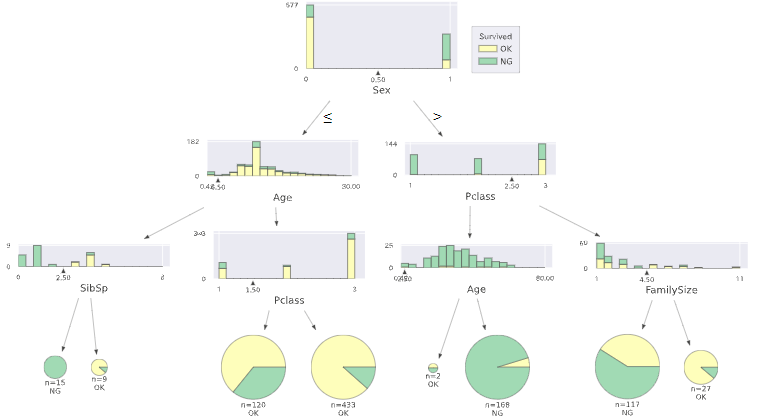


# **<font color= "Crimson">★ 最初に『目的変数のクラス』を設定してください</font>**
例：['OK' , 'NG']、['live' , 'die']、['good' , 'bad']、['good' , 'soso' , 'bad']、['typeA' , 'typeB' , 'typeC'] 等

In [36]:
CLASS_NAME = ['OK','NG']

##**説明**
これは、**Google Colab専用**の決定木分析（分類）の自動機械学習ツールです。

1.   まず、ランタイム → すべてのセルを実行 してください。
2.   つぎに「2.ファイル読込み」に移動してください。ライブラリのインポートが完了すると [ファイル選択] ボタンが表示されますので、ボタンをクリックし、csvファイルを指定してください。\
※データ形式は、以下の事前準備参照
3.   「3.決定木（木の深さ2,3,4）」に移動すると、木の深さ毎の決定木が確認できます。（※depth2.svg,depth3.svg,depth4.svg データとしても出力します）
**→ 可読性がよいと判断した深さの決定木にて、データの構造を読み取ってみましょう**

\
***
**以下は参考です**
4.   「4.モデル学習」は、データを学習データとテストデータに分割し、交差検証含めた学習を実行します。
5.   「5．モデル評価」は、学習後のモデルの評価です。

##**事前準備**
*   読込みデータは**csv**です。以下のようにX(説明変数)を並べた後、最終列にy(目的変数)を配置したデータとしてください。

>|X1 |X2 |X3 |X4 |X5 |X6 |X7 |・・・|y |
|---|---|---|---|---|---|---|---|---|
|5 |2 |3 |  |  |  |  |  |0|
|4 |5 |8 |　|  |  |  |  |1|

*   データは**数値データ**としてください。
*   カラム名が日本語の場合、文字化けします。**カラム名は英字に変更**しておいてください。

※欠損値があれば、その行は取り除いて分析します。


# **1．ライブラリのインストールとインポート**

In [37]:
pip install japanize-matplotlib

In [38]:
# Import required libraries 
%matplotlib inline 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import japanize_matplotlib 
import seaborn as sns 
sns.set(font="IPAexGothic")  
from scipy.stats import norm

In [39]:
pip install graphviz

In [40]:
pip install dtreeviz

In [41]:
pip install -U yellowbrick

In [42]:
from sklearn import tree
from dtreeviz.trees import *
import graphviz
import yellowbrick
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.model_selection import FeatureImportances

In [43]:
import warnings
warnings.filterwarnings('ignore')

# **2．ファイル読込み**
**★ [ファイル選択] ボタンにて決定木分析したいcsvファイルを選択してください**

In [44]:
from google.colab import files
uploaded = files.upload()

Saving titanic_train_mod3.csv to titanic_train_mod3 (1).csv


## **データ処理**

In [45]:
if len(uploaded.keys()) != 1:
    print("アップロードは１ファイルにのみ限ります")
else:
    target = list(uploaded.keys())[0]

In [46]:
df = pd.read_csv(target)

In [47]:
# 欠損値のある行を削除（※ how ='any' は欠損がひとつでもあれば、その行を削除）
df = df.dropna(how='any')

In [48]:
#数値の列は残し、文字列だけを削除
df = df.select_dtypes(exclude='object')

In [49]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Survived
0,3,0,22.0,1,0,7.2500,0,2,0,0
1,1,1,38.0,1,0,71.2833,1,2,0,1
2,3,1,26.0,0,0,7.9250,0,1,1,1
3,1,1,35.0,1,0,53.1000,0,2,0,1
4,3,0,35.0,0,0,8.0500,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,0,1,1,0
887,1,1,19.0,0,0,30.0000,0,1,1,1
888,3,1,28.0,1,2,23.4500,0,4,0,0
889,1,0,26.0,0,0,30.0000,1,1,1,1


In [50]:
FEATURES = df.columns[:-1]
TARGET = df.columns[-1]

X = df.loc[:, FEATURES]
y = df.loc[:, TARGET]

# **3．決定木（木の深さ2,3,4）**
決定木は木の深さが増すほど解釈や説明はむつかしく、シンプルなほど解釈はしやすい。以下では比較的解釈が容易な深さ2,3,4の決定木を描かせている。
*   #orientation='LR' の # を消すと、決定木の表示は横向きになる
*   予測したいXの値を X=[X1,X2,X3,X4,…] に設定すれば、予測値が表示される

##**決定木：木の深さ2**

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


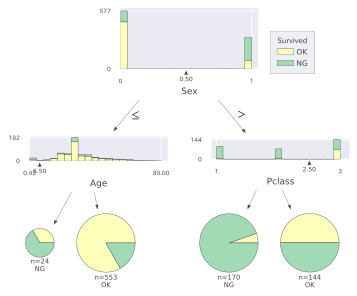

In [51]:
#決定木分析と出力
dtree = tree.DecisionTreeClassifier(max_depth=2)
dtree.fit(X,y)

viz = dtreeviz(dtree,X,y,
               target_name = TARGET,
               feature_names = FEATURES,
               #orientation='LR',
               class_names = CLASS_NAME,
               #X = [3,3,3,5,3]
              )

viz

In [52]:
viz.save("depth2.svg")

## **決定木：木の深さ3**

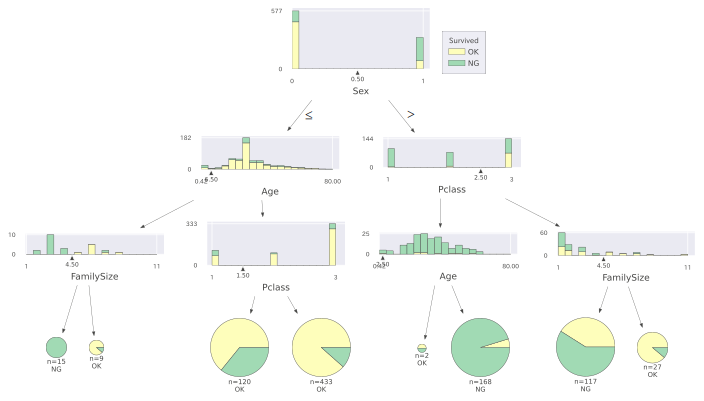

In [53]:
#決定木分析と出力
dtree = tree.DecisionTreeClassifier(max_depth=3)
dtree.fit(X,y)

viz = dtreeviz(dtree,X,y,
               target_name = TARGET,
               feature_names = FEATURES,
               #orientation='LR',
               class_names = CLASS_NAME,
               #X = [3,3,3,5,3]
              )

viz

In [54]:
viz.save("depth3.svg")

## **決定木：木の深さ4**

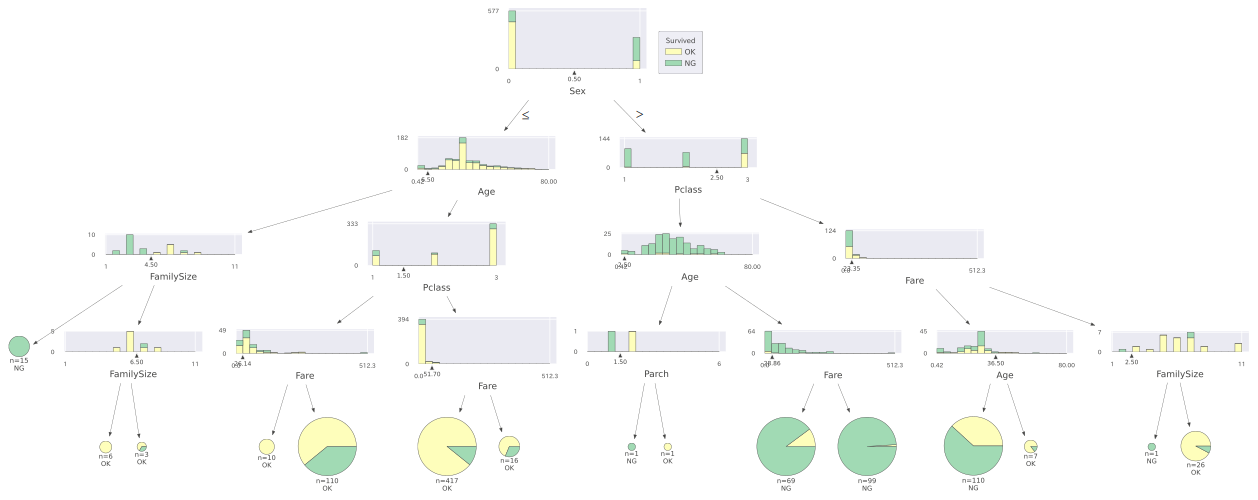

In [55]:
#決定木分析と出力
dtree = tree.DecisionTreeClassifier(max_depth=4)
dtree.fit(X,y)

viz = dtreeviz(dtree,X,y,
               target_name = TARGET,
               feature_names = FEATURES,
               #orientation='LR',
               class_names = CLASS_NAME,
               #X = [3,3,3,5,3]
              )

viz

In [56]:
viz.save("depth4.svg")

# **4．モデル学習**

##**データ分割**　　
*   default：test‗size=0.20 ←80％学習/20％テスト ※test_sizeにて任意変更可

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.20,
    random_state = 1)

## **ハイパーパラメータ設定と学習**

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# グリッドサーチのパラメータを辞書型で設定
param = {'max_depth':[1, 2, 3, 4, 5],
         'min_samples_leaf':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
         'min_samples_split':[2, 3, 4, 5]}
 
# 決定木による学習
clf = GridSearchCV(tree.DecisionTreeClassifier(),   # グリッドサーチで決定木を定義
                   param, cv=10, iid=True)
clf.fit(X_train, y_train)                           # フィッティング

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid=True, n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_

#**5．モデル評価**

## **最良条件**

In [59]:
# スコアとパラメータの組み合わせ
scores = clf.cv_results_['mean_test_score']
params = clf.cv_results_['params']
 
# 結果の確認
best_clf = clf.best_estimator_
print('最良条件:\n', best_clf)
print('学習データ:\n', best_clf.score(X_train, y_train))
print('テストデータ:\n', best_clf.score(X_test, y_test))
#for i in range(len(scores)):
#    print(scores[i], params[i])

最良条件:
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
学習データ:
 0.8497191011235955
テストデータ:
 0.7877094972067039


## **ConfusionMatrix（混同行列）**
*   2値分類のAIによる判断は[0～0.5未満]→0、[0.5以上]→1、この判断結果を行列で示したのが混同行列
*   行が実際、列がAI判定、左上が実際：真/AI判定：真，右下が実際：偽/AI判定：偽 となるので、左下、右下0が理想



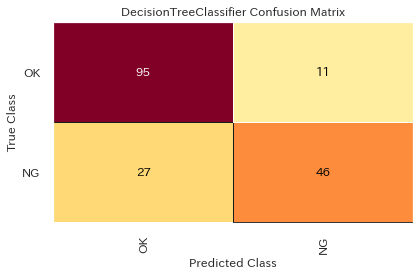

In [60]:
visualizer = ConfusionMatrix(best_clf, classes=CLASS_NAME)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof();

## **ROC曲線**
*   横軸（偽陽性率：FPR）、縦軸（真陽性率：TPR）や再現率（Recall）
*   **横軸：誤報率、縦軸：検知率とすると認識しやすい**
*   AUC:area under the curve ROC曲線下の面積、理想=1



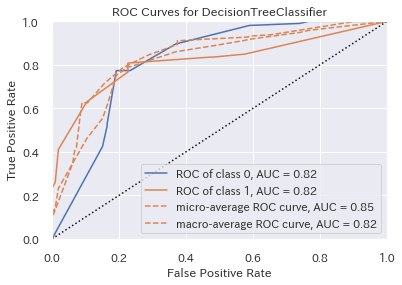

In [61]:
visualizer = ROCAUC(best_clf)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof();

##**特徴量重要度**
*   特徴量重要度とは「その特徴量の分割がターゲットの分類にどれくらい寄与しているかを測る指標」




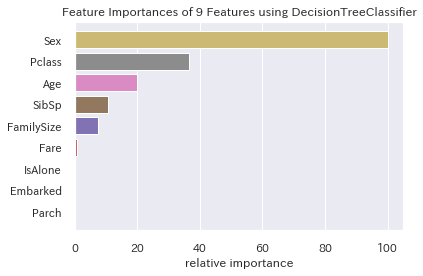

In [62]:
visualizer = FeatureImportances(best_clf)
visualizer.fit(X_train, y_train)
visualizer.poof();

## **学習曲線**

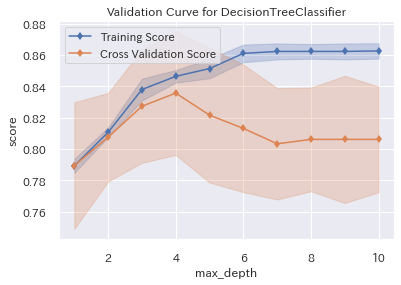

In [63]:
from yellowbrick.model_selection import ValidationCurve
visualizer = ValidationCurve(
    best_clf, param_name="max_depth",
    param_range=np.arange(1, 11), cv=10, scoring="accuracy"
)

visualizer.fit(X_train, y_train)
visualizer.poof();

## **Discrimination threshold**
このビジュアライザーは、バイナリ分類に対してのみ機能。  
二項分類器の識別しきい値に関する適合率、再現率、f1スコア、およびキューレートの視覚化。弁別閾値は、正クラスが負クラスにわたって選択される確率またはスコアです。通常、これは50％に設定されるが、しきい値を調整して、誤検知または他のアプリケーション要因に対する感度を増減できる。

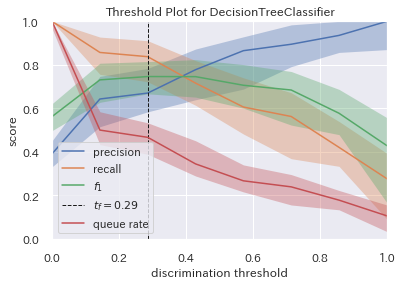

In [64]:
from yellowbrick.classifier import DiscriminationThreshold

visualizer = DiscriminationThreshold(best_clf)

visualizer.fit(X, y)
visualizer.poof();

##**決定木**

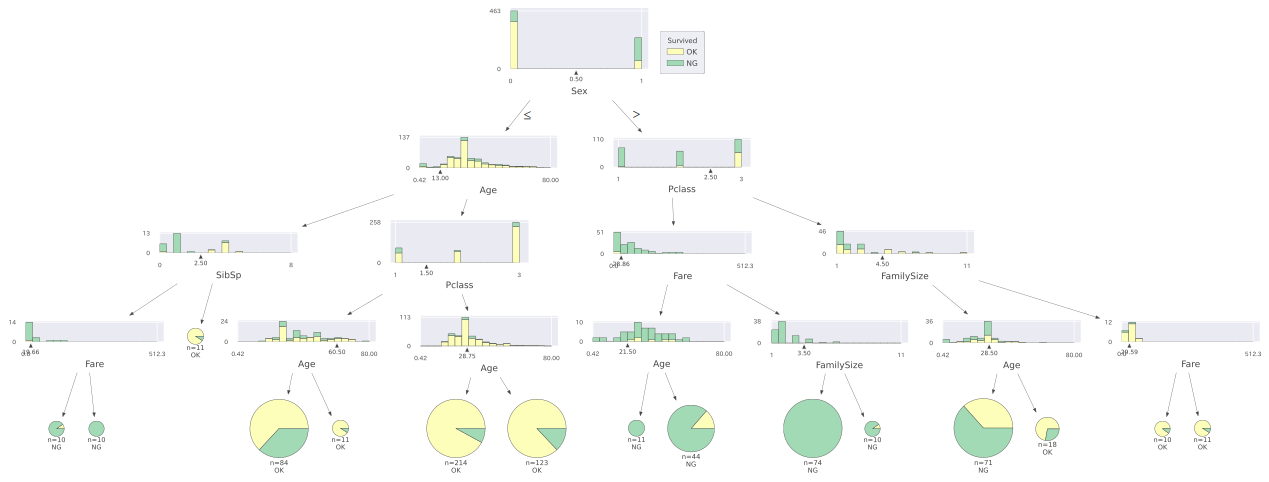

In [65]:
#決定木（縦向き）
viz = dtreeviz(clf.best_estimator_,
               X_train,
               y_train,
               target_name = TARGET,
               feature_names = FEATURES,
               #orientation='LR',
               #X = [3,3,5,3]
               class_names = CLASS_NAME
              )

viz

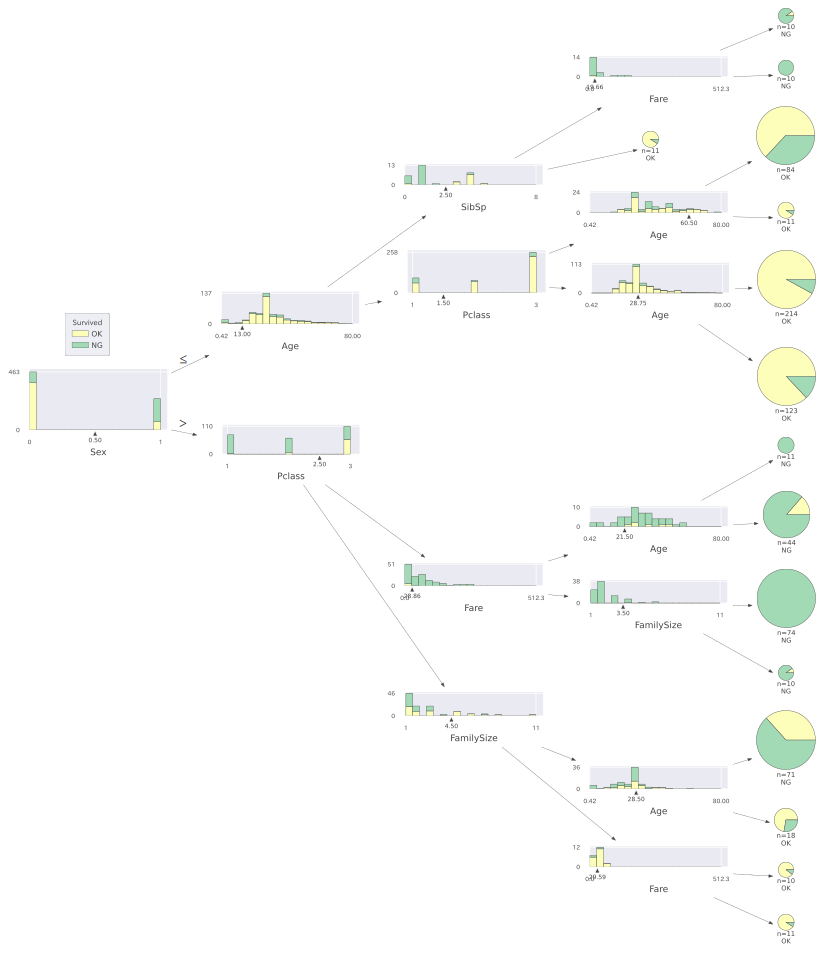

In [66]:
#決定木（横向き）
viz = dtreeviz(clf.best_estimator_,
               X_train,
               y_train,
               target_name = TARGET,
               feature_names = FEATURES,
               orientation='LR',
               #X = [3,3,5,3]
               class_names = CLASS_NAME
              )

viz

# **6．備考**

## **決定木（デシジョンツリー）について**
ある対象や課題を分類・予測・判定するための条件分岐のアルゴリズムを図式化した木構造のグラフ。意思決定や戦略立案のほか、機械学習やデータマイニングの分野で用いられる。ある要素（親ノード）を起点として想定しうる結果を複数の要素（子ノード）の枝分かれで表し、条件分岐を繰り返したもの。木構造で表現できるので非常に可読性が高い。

 *   **dtreeviz**　：https://github.com/parrt/dtreeviz

## **ML可視化のマニュアルコード（専用ライブラリ使用のため没）**

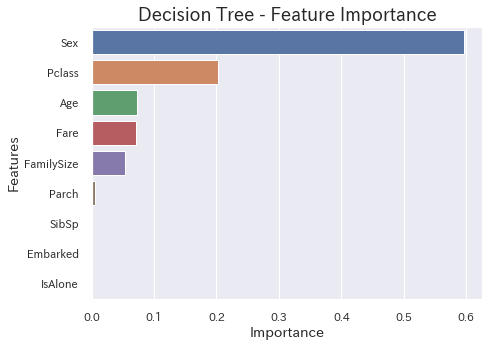

In [67]:
# 決定木の説明変数の重要度をデータフレーム化
fea_clf_imp = pd.DataFrame({'imp': dtree.feature_importances_, 'col': FEATURES})
fea_clf_imp = fea_clf_imp.sort_values(by='imp', ascending=False)

# 決定木の重要度を可視化
plt.figure(figsize=(7,5))
sns.barplot('imp','col',data=fea_clf_imp,orient='h')
plt.title('Decision Tree - Feature Importance',fontsize=18)
plt.ylabel('Features',fontsize=14)
plt.xlabel('Importance',fontsize=14)

plt.show()

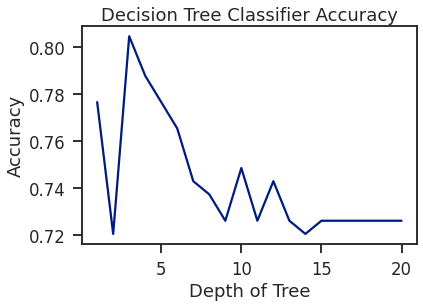

In [68]:
# Create for loop to prune tree
scores = []

for i in range(1, 21):
    tree = DecisionTreeClassifier(random_state=1, max_depth=i)
    tree.fit(X_train, y_train)
    score = tree.score(X_test, y_test)
    scores.append(tree.score(X_test, y_test))
    
# Plot graph to see how individual accuracy scores changes with tree depth
sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('ticks')

plt.plot(range(1, 21), scores)
#plt.ylim(0.5,1.0) #y軸範囲指定
plt.xlabel("Depth of Tree")
plt.ylabel("Accuracy")
plt.title("Decision Tree Classifier Accuracy")
plt.show()